In [ ]:
# !pip install keras
# !pip install tensorflow (CPU VERSION)
# !pip install tensorflow-gpu (GPU VERSION)

import csv
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
from sklearn.model_selection import train_test_split

In [ ]:


train = pd.read_csv('/content/train PreProcessed.csv')
# pull data into target (y) and predictors (X)
train["Quality"] = np.where(train["Quality"].str.contains("Good"), 1, 0)
train_y = train.Quality
#tengo volatile e density perchè li ho sistemati
predictor_cols = ['fixed.acidity','volatile.acidity','citric.acid','residual.sugar','chlorides','free.sulfur.dioxide',
                  'total.sulfur.dioxide','density','pH','sulphates','alcohol']
# Create training predictors data
train_X = train[predictor_cols]

scaler = StandardScaler()

train_X_std = scaler.fit_transform(train_X)

# Create our imputer to replace missing values with the mean e.g.
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
#imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp = imp.fit(train_X_std)

# Impute our data, then train
train_X_imp = imp.transform(train_X_std)
print(train_X_imp.shape)

(3489, 11)


Calcolo f1 score

In [ ]:
def recall_m(y_true, y_pred):
    y_true = K.ones_like(y_true) 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    all_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    
    recall = true_positives / (all_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    y_true = K.ones_like(y_true) 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
print(train_X_imp[0])

In [ ]:
import tensorflow as tf

# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

#Initialize the constructor
model = Sequential()
#Add an input layer
model.add(Dense(12, activation='sigmoid', input_shape=(11,)))
#Add one hidden layer
model.add(Dense(11, activation='sigmoid'))
#Add one hidden layer
model.add(Dense(4, activation='sigmoid'))
#Add an output layer 
model.add(Dense(1, activation='sigmoid')) 



In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(train_X_imp, train_y, train_size = 0.8, random_state = 0)

In [ ]:

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',tf.keras.metrics.AUC(), f1_score])
                   
training_phase =model.fit(xTrain, yTrain ,epochs=500,
                       batch_size=150,  validation_data=(xTest,yTest),
                        verbose=1)

Epoch 1/500
19/19 [==============================] - 0s 18ms/step - loss: 0.6402 - accuracy: 0.6578 - auc_1: 0.6352 - f1_score: 1.0000 - val_loss: 0.6508 - val_accuracy: 0.6418 - val_auc_1: 0.6241 - val_f1_score: 1.0000
Epoch 2/500
19/19 [==============================] - 0s 3ms/step - loss: 0.6393 - accuracy: 0.6578 - auc_1: 0.6630 - f1_score: 1.0000 - val_loss: 0.6498 - val_accuracy: 0.6418 - val_auc_1: 0.6640 - val_f1_score: 1.0000
Epoch 3/500
19/19 [==============================] - 0s 3ms/step - loss: 0.6385 - accuracy: 0.6578 - auc_1: 0.6846 - f1_score: 1.0000 - val_loss: 0.6488 - val_accuracy: 0.6418 - val_auc_1: 0.6733 - val_f1_score: 1.0000
Epoch 4/500
19/19 [==============================] - 0s 3ms/step - loss: 0.6373 - accuracy: 0.6578 - auc_1: 0.7022 - f1_score: 1.0000 - val_loss: 0.6476 - val_accuracy: 0.6418 - val_auc_1: 0.6845 - val_f1_score: 1.0000
Epoch 5/500
19/19 [==============================] - 0s 3ms/step - loss: 0.6361 - accuracy: 0.6578 - auc_1: 0.7072 - f1_sco

loss


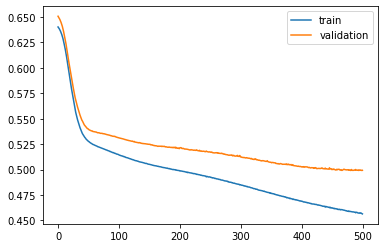

Accuracy


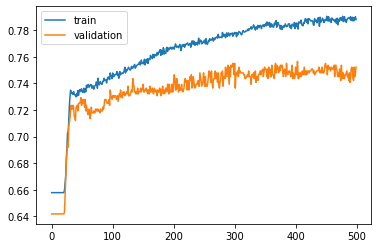

F1 score


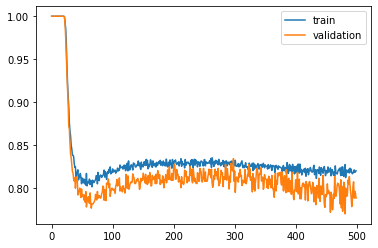

In [ ]:
    import matplotlib.pyplot as pyplot
    
    # plot training history
    print("loss")
    pyplot.plot(training_phase.history['loss'], label='train')
    pyplot.plot(training_phase.history['val_loss'], label='validation')
    pyplot.legend()
    pyplot.show()
    
    print("Accuracy")
    pyplot.plot(training_phase.history['accuracy'], label='train')
    pyplot.plot(training_phase.history['val_accuracy'], label='validation')
    pyplot.legend()
    pyplot.show()

    print("F1 score")
    pyplot.plot(training_phase.history['f1_score'], label='train')
    pyplot.plot(training_phase.history['val_f1_score'], label='validation')
    pyplot.legend()
    pyplot.show()



In [ ]:
# testAcc = model.evaluate(xTest, yTest, verbose=1)
#print(testAcc)

698/698 [==============================] - 0s 45us/step
[0.4895075864470791, 0.7578796744346619, 0.8138524889945984, 0.8005756735801697]


In [ ]:
# predict probabilities for test set
#yhat_probs = model.predict(xTest, verbose=0)
# predict crisp classes for test set
#yhat_classes = model.predict_classes(xTest, verbose=0)

# reduce to 1d array
#yhat_probs = yhat_probs[:, 0]
#yhat_classes = yhat_classes[:, 0]


In [ ]:
# y_pred = model.predict(xTrain)
 # print("Confusion Matrix:")
 # print(confusion_matrix(yTrain, y_pred))
  #print("Classification Report:")
  #print(classification_report(yTrain, y_pred), "\n\n")

In [ ]:
    #TEST SET
    test = pd.read_csv('/content/test.csv')
    # Treat the test data in the same way as training data. In this case, pull same columns.
    test_X = test[predictor_cols]

    test_X_std = scaler.transform(test_X)

    # Impute each test item, then predict
    test_X_imp = imp.transform(test_X_std)

    # Use the model to make predictions
    predicted_q = model.predict(test_X_imp)
    # We will look at the predicted Qualities to ensure we have something sensible.
    predicted_q = [round(x[0]) for x in predicted_q]

    for i in range (0,len(predicted_q)):
        predicted_q[i]=int(predicted_q[i])

    print(predicted_q)

    #prepare kaggle submission
    my_submission = pd.DataFrame({'Id': test.Id, 'Quality': predicted_q})
    # you could use any filename. We choose submission here
    my_submission.to_csv('neuralNet100.csv', index=False)

[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 